In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


In [ ]:
!make

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install pyyolo

In [ ]:
import os
os.environ["LIB_DARKNET"] = '/content/darknet/libdarknet.so'
import numpy as np
import pytesseract
import cv2
import pyyolo
import re
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive 
!ls -l /mydrive

In [ ]:
!unzip /mydrive/yolov4/obj.zip -d /content/darknet/data/

In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
!cp /mydrive/yolov4/yolov4_custom2.cfg /content/darknet/cfg/
!cp /mydrive/backup/yolov4_custom2_last.weights /content/darknet/
!cp /mydrive/thedemo2.mp4 /content/darknet/
!cp /mydrive/demo.mp4 /content/darknet/
!cp /mydrive/yolov4/generate_train.py ./
!python generate_train.py
!cp /mydrive/yolov4/obj.names ./data
!cp /mydrive/yolov4/obj.data  ./data

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4_custom2.cfg /mydrive/backup/yolov4_custom2_1000.weights -dont_show

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4_custom2.cfg /mydrive/yolov4/yolov4_custom2_last.weights /mydrive/testimage.jpg

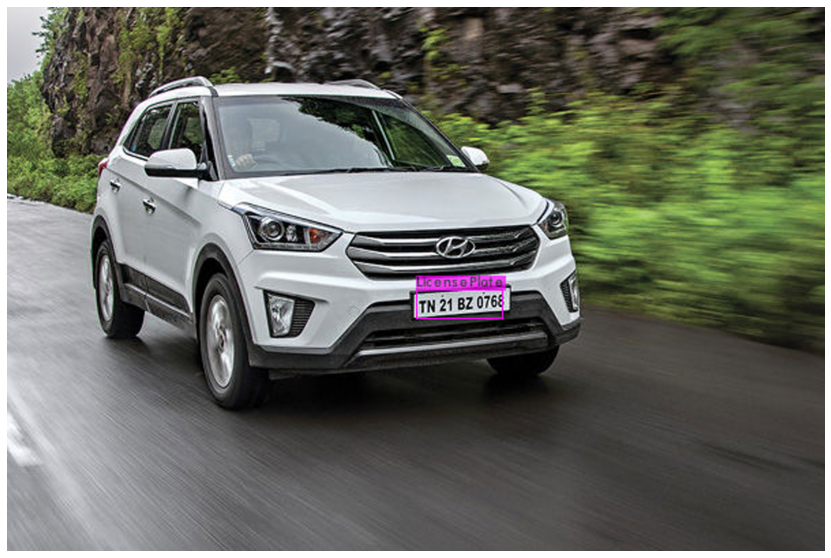

In [ ]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov4_custom2.cfg /mydrive/yolov4/yolov4_custom2_last.weights -dont_show /mydrive/thedemo.mp4 -i 0 -out_filename results.avi


In [ ]:
detector = pyyolo.YOLO("/content/darknet/cfg/yolov4_custom2.cfg",
                           "/content/darknet/yolov4_custom2_last.weights",
                           "/content/darknet/data/obj.data",
                           detection_threshold = 0.8,
                           hier_threshold = 0.7,
                           nms_threshold = 0.7)

In [ ]:
cap = cv2.VideoCapture('/content/darknet/demo.mp4')
while True:
    ret, frame = cap.read()
    if ret:
        dets = detector.detect(frame, rgb=False)
        for i, det in enumerate(dets):
            xmin, ymin, xmax, ymax = det.to_xyxy()
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 0, 255))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image = frame[ymin:ymax,xmin:xmax]
            text=pytesseract.image_to_string(image)
            text = re.sub("[^A-Z0-9]", "", text)
            pattern='^[A-Z]{2}[0-9]{2}[A-Z]{1,2}[0-9]{4}$'
            m=re.search(pattern,text)
            if m:
              print(f'Detection: {i}, {det}')
              plt.imshow(frame) 
              plt.show()
              cv2_imshow(image)
              print(m.group())
    else:
      break

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)